<a href="https://colab.research.google.com/github/Manojgharge07/Datascience_Mentorship_SQL_Basic/blob/main/RFM_SQL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import some libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from numpy import *

In [ ]:
# Making dataframe:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/All CSV files/Copy of Online Retail.xlsx")

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365.0,22752.0,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365.0,21730.0,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366.0,22633.0,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366.0,22632.0,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367.0,84879.0,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Drop the unused columns

In [ ]:
# drop the unused columns:
df.drop(['StockCode', 'Description', 'Country'], inplace=True, axis=1)
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365.0,6.0,2010-12-01 08:26:00,2.55,17850.0
1,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0
2,536365.0,8.0,2010-12-01 08:26:00,2.75,17850.0
3,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0
4,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0


In [ ]:
# Rename the columns name:
df.rename(columns={'InvoiceNo':'OrderID', 'InvoiceDate':'Order_Date', 'UnitPrice':'Sales_Price'}, inplace=True)
df.head()

,OrderID,Quantity,Order_Date,Sales_Price,CustomerID
0,536365.0,6.0,2010-12-01 08:26:00,2.55,17850.0
1,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0
2,536365.0,8.0,2010-12-01 08:26:00,2.75,17850.0
3,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0
4,536365.0,6.0,2010-12-01 08:26:00,3.39,17850.0


In [ ]:
#Arrenging by order:
first_column = df.pop('Order_Date')
df.insert(1, 'Order_Date', first_column)
df

,OrderID,Order_Date,Quantity,Sales_Price,CustomerID
0,536365.0,2010-12-01 08:26:00,6.0,2.55,17850.0
1,536365.0,2010-12-01 08:26:00,6.0,3.39,17850.0
2,536365.0,2010-12-01 08:26:00,8.0,2.75,17850.0
3,536365.0,2010-12-01 08:26:00,6.0,3.39,17850.0
4,536365.0,2010-12-01 08:26:00,6.0,3.39,17850.0
...,...,...,...,...,...
541904,581587.0,2011-12-09 12:50:00,12.0,0.85,12680.0
541905,581587.0,2011-12-09 12:50:00,6.0,2.10,12680.0
541906,581587.0,2011-12-09 12:50:00,4.0,4.15,12680.0
541907,581587.0,2011-12-09 12:50:00,4.0,4.15,12680.0


In [ ]:
#Arrenging by order:
first_column = df.pop('CustomerID')
df.insert(2, 'CustomerID', first_column)
df

,OrderID,Order_Date,CustomerID,Quantity,Sales_Price
0,536365.0,2010-12-01 08:26:00,17850.0,6.0,2.55
1,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
2,536365.0,2010-12-01 08:26:00,17850.0,8.0,2.75
3,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
4,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
...,...,...,...,...,...
541904,581587.0,2011-12-09 12:50:00,12680.0,12.0,0.85
541905,581587.0,2011-12-09 12:50:00,12680.0,6.0,2.10
541906,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15
541907,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   OrderID      541909 non-null  object        
 1   Order_Date   541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   Quantity     541909 non-null  float64       
 4   Sales_Price  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 20.7+ MB


In [ ]:
df[df.isnull().any(axis=1)]

,OrderID,Order_Date,CustomerID,Quantity,Sales_Price
622,536414.0,2010-12-01 11:52:00,NaN,56.0,0.00
1443,536544.0,2010-12-01 14:32:00,NaN,1.0,2.51
1444,536544.0,2010-12-01 14:32:00,NaN,2.0,2.51
1445,536544.0,2010-12-01 14:32:00,NaN,4.0,0.85
1446,536544.0,2010-12-01 14:32:00,NaN,2.0,1.66
...,...,...,...,...,...
541536,581498.0,2011-12-09 10:26:00,NaN,5.0,4.13
541537,581498.0,2011-12-09 10:26:00,NaN,4.0,4.13
541538,581498.0,2011-12-09 10:26:00,NaN,1.0,4.96
541539,581498.0,2011-12-09 10:26:00,NaN,1.0,10.79


In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
df

,OrderID,Order_Date,CustomerID,Quantity,Sales_Price
0,536365.0,2010-12-01 08:26:00,17850.0,6.0,2.55
1,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
2,536365.0,2010-12-01 08:26:00,17850.0,8.0,2.75
3,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
4,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
...,...,...,...,...,...
541904,581587.0,2011-12-09 12:50:00,12680.0,12.0,0.85
541905,581587.0,2011-12-09 12:50:00,12680.0,6.0,2.10
541906,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15
541907,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15


# Dropping negative values

In [ ]:
df.drop(df[df['Quantity'] <=0.0].index, inplace=True)
df

,OrderID,Order_Date,CustomerID,Quantity,Sales_Price
0,536365.0,2010-12-01 08:26:00,17850.0,6.0,2.55
1,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
2,536365.0,2010-12-01 08:26:00,17850.0,8.0,2.75
3,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
4,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
...,...,...,...,...,...
541904,581587.0,2011-12-09 12:50:00,12680.0,12.0,0.85
541905,581587.0,2011-12-09 12:50:00,12680.0,6.0,2.10
541906,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15
541907,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15


In [ ]:
df.drop(df[df['Sales_Price'] <=0.0].index, inplace=True)
df

,OrderID,Order_Date,CustomerID,Quantity,Sales_Price
0,536365.0,2010-12-01 08:26:00,17850.0,6.0,2.55
1,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
2,536365.0,2010-12-01 08:26:00,17850.0,8.0,2.75
3,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
4,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39
...,...,...,...,...,...
541904,581587.0,2011-12-09 12:50:00,12680.0,12.0,0.85
541905,581587.0,2011-12-09 12:50:00,12680.0,6.0,2.10
541906,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15
541907,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15


# Finding total sales price for each customer

In [ ]:
df["Total_Sales_Price"]= df["Quantity"]*df["Sales_Price"]
df

,OrderID,Order_Date,CustomerID,Quantity,Sales_Price,Total_Sales_Price
0,536365.0,2010-12-01 08:26:00,17850.0,6.0,2.55,15.30
1,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39,20.34
2,536365.0,2010-12-01 08:26:00,17850.0,8.0,2.75,22.00
3,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39,20.34
4,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39,20.34
...,...,...,...,...,...,...
541904,581587.0,2011-12-09 12:50:00,12680.0,12.0,0.85,10.20
541905,581587.0,2011-12-09 12:50:00,12680.0,6.0,2.10,12.60
541906,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15,16.60
541907,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15,16.60


In [ ]:
df

,OrderID,Order_Date,CustomerID,Quantity,Sales_Price,Total_Sales_Price
0,536365.0,2010-12-01 08:26:00,17850.0,6.0,2.55,15.30
1,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39,20.34
2,536365.0,2010-12-01 08:26:00,17850.0,8.0,2.75,22.00
3,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39,20.34
4,536365.0,2010-12-01 08:26:00,17850.0,6.0,3.39,20.34
...,...,...,...,...,...,...
541904,581587.0,2011-12-09 12:50:00,12680.0,12.0,0.85,10.20
541905,581587.0,2011-12-09 12:50:00,12680.0,6.0,2.10,12.60
541906,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15,16.60
541907,581587.0,2011-12-09 12:50:00,12680.0,4.0,4.15,16.60


# Change the date-time formate in dd-mm-yy and deleting hrs-ss

In [ ]:
#changing into datetimeforat
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [ ]:
#removing hrs:second from date
df['Order_Date'] = df['Order_Date'].dt.strftime('%d/%m/%Y')
df.head()

,OrderID,Order_Date,CustomerID,Quantity,Sales_Price,Total_Sales_Price
0,536365.0,01/12/2010,17850.0,6.0,2.55,15.30
1,536365.0,01/12/2010,17850.0,6.0,3.39,20.34
2,536365.0,01/12/2010,17850.0,8.0,2.75,22.00
3,536365.0,01/12/2010,17850.0,6.0,3.39,20.34
4,536365.0,01/12/2010,17850.0,6.0,3.39,20.34


# Copy new CSV file

In [ ]:
df.to_csv("new_online_retail")

# **used data.world For SQL**

# **SQL Query for RFM Analysis**

In [ ]:
#sql query for rfm analysis
'''WITH dataset AS (
    SELECT customerid,
    MAX(order_date) as last_order_date,
    COUNT(orderid) as count_order,
    SUM(new_online_retail.sales_price) as avg_amount
        from new_online_retail
        group by customerid
),

order_s as (
    SELECT customerid,
    NTILE(3) OVER (ORDER BY last_order_date) as rfm_recency,
    NTILE(3) OVER (ORDER BY count_order) as rfm_frequency,
    NTILE(3) OVER (ORDER BY avg_amount) as rfm_monetary
    FROM dataset
)
select customerid, rfm_recency*100 + rfm_frequency*10 + rfm_monetary as rfm_combined 
from order_s
ORDER BY customerid ASC'''

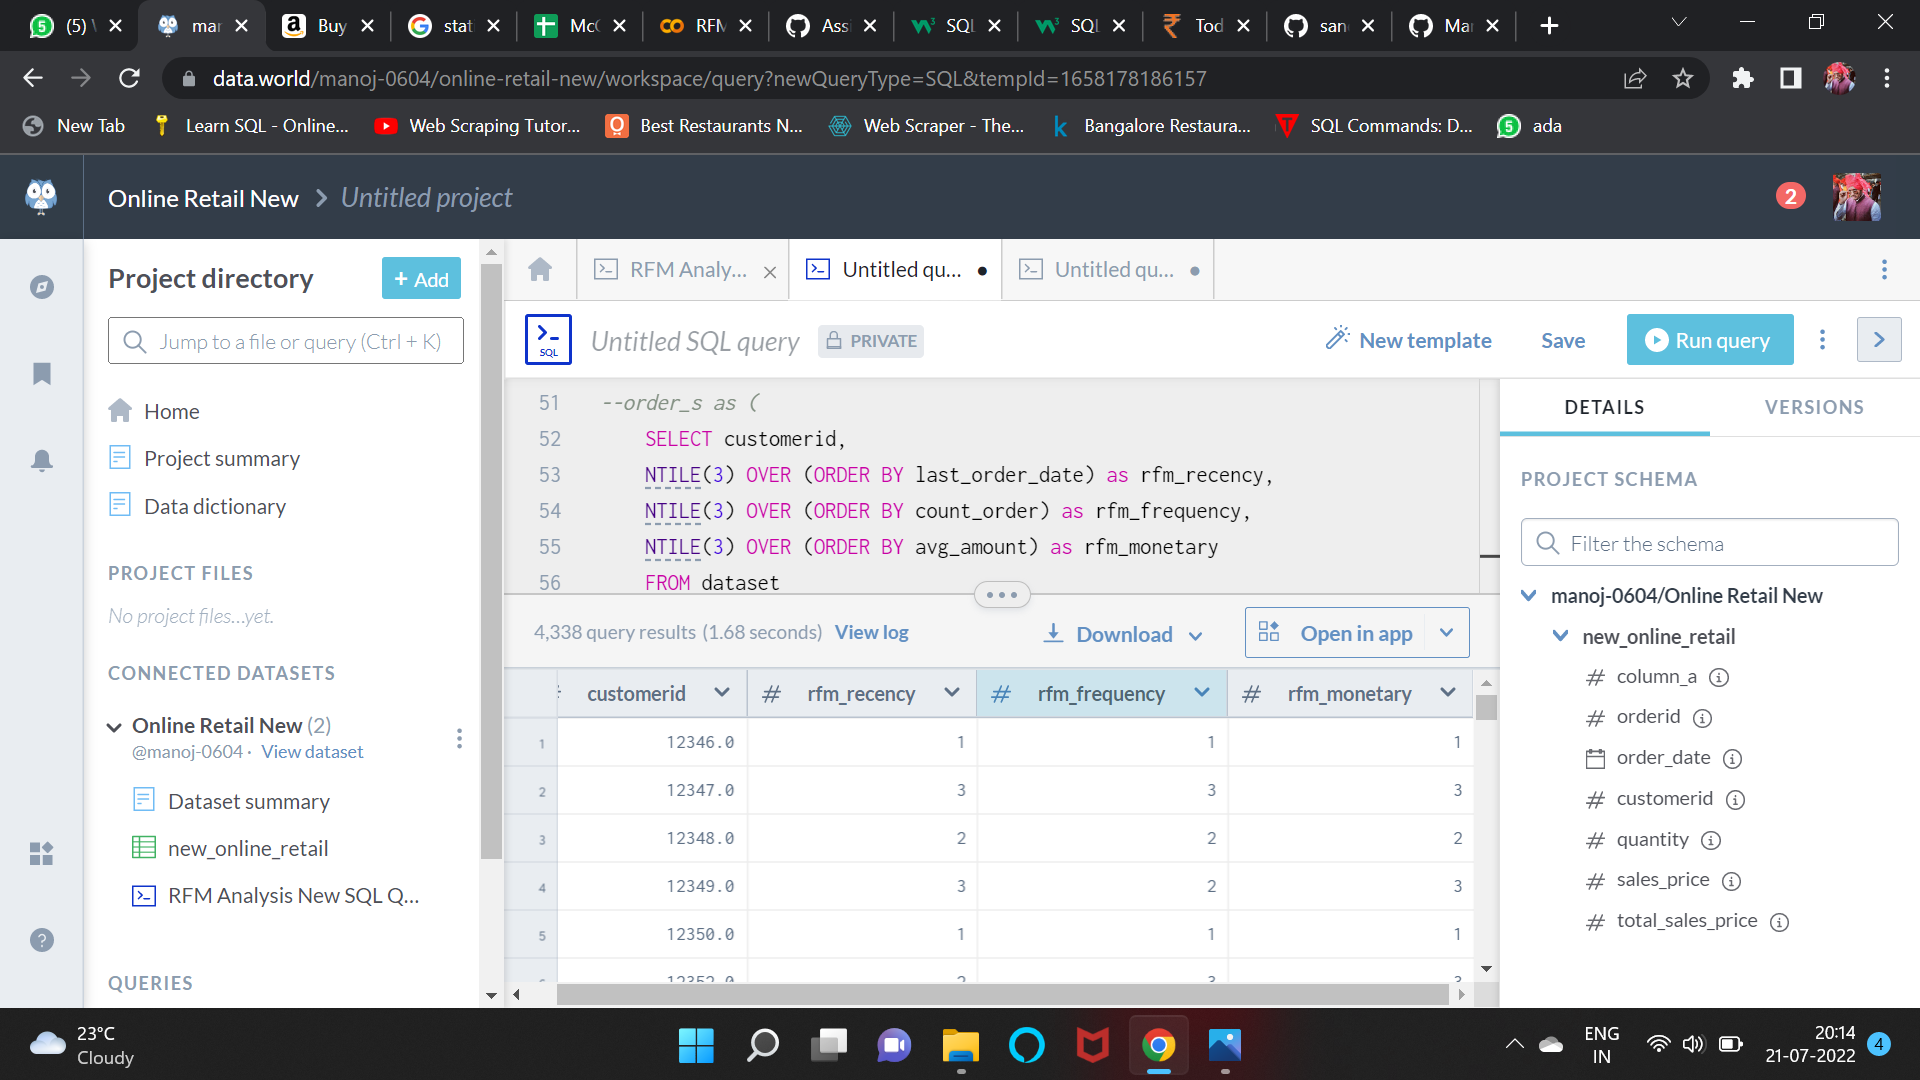

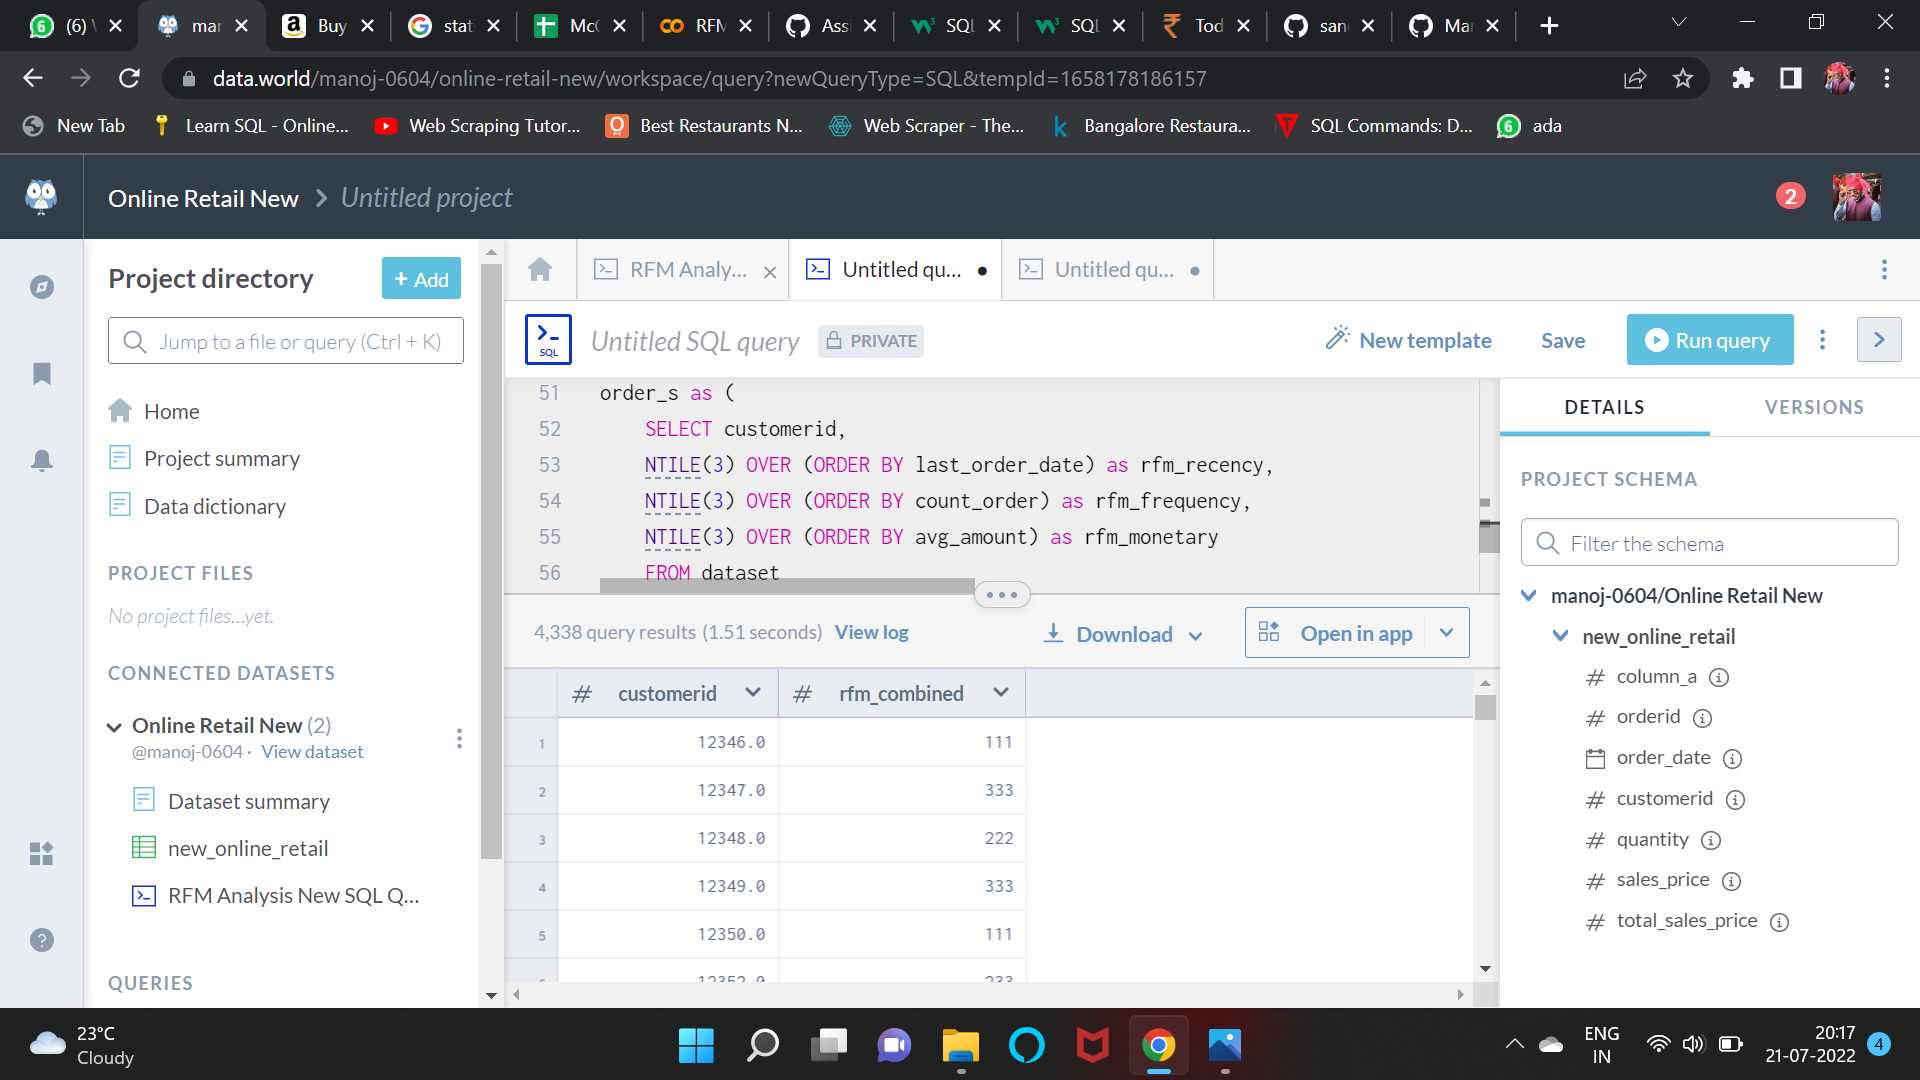

# **SQL Query for RFM Analysis**

In [ ]:
#different querry for rfm analysis
'''SELECT * FROM new_online_retail LIMIT 10000


/** step 2. Exam the dataset **/
SELECT 
    orderid,
    order_date,
    customerid,
    sales_price,
    COUNT(orderid) OVER(PARTITION BY customerid, orderid)

FROM new_online_retail


/** step 3. summerise the dataset **/
Order_Summary as (
    
    SELECT
        orderid, order_date, customerid,
        SUM(sales_price)
    FROM new_online_retail
    GROUP BY orderid, order_date, customerid


/** step 4. put together the RFM report **/
SELECT
orderid, order_date, customerid,
(SELECT MIN(order_date) FROM new_online_retail) as min_order_date,
(SELECT MAX(order_date) FROM new_online_retail WHERE customerid = customerid) as max_customer_order_date,
DATE_DIFF ((SELECT MIN(order_date) FROM new_online_retail WHERE customerid = customerid),(SELECT MAX(order_date) FROM new_online_retail), 'DAY' ) as Recency,
COUNT(orderid) as Frequency,
SUM(sales_price) as Monetary
NTILE(3) OVER (ORDER BY DATE_DIFF ((SELECT MIN(order_date) FROM new_online_retail WHERE customerid = customerid),(SELECT MAX(order_date) FROM new_online_retail), 'DAY') DESC) as R,
NTILE(3) OVER (ORDER BY COUNT(orderid) ASC) F,
NTILE(3) OVER (ORDER BY SUM(sales_price) ASC) M

FROM new_online_retail
GROUP BY customerid
ORDER BY 1, 3 DESC'''

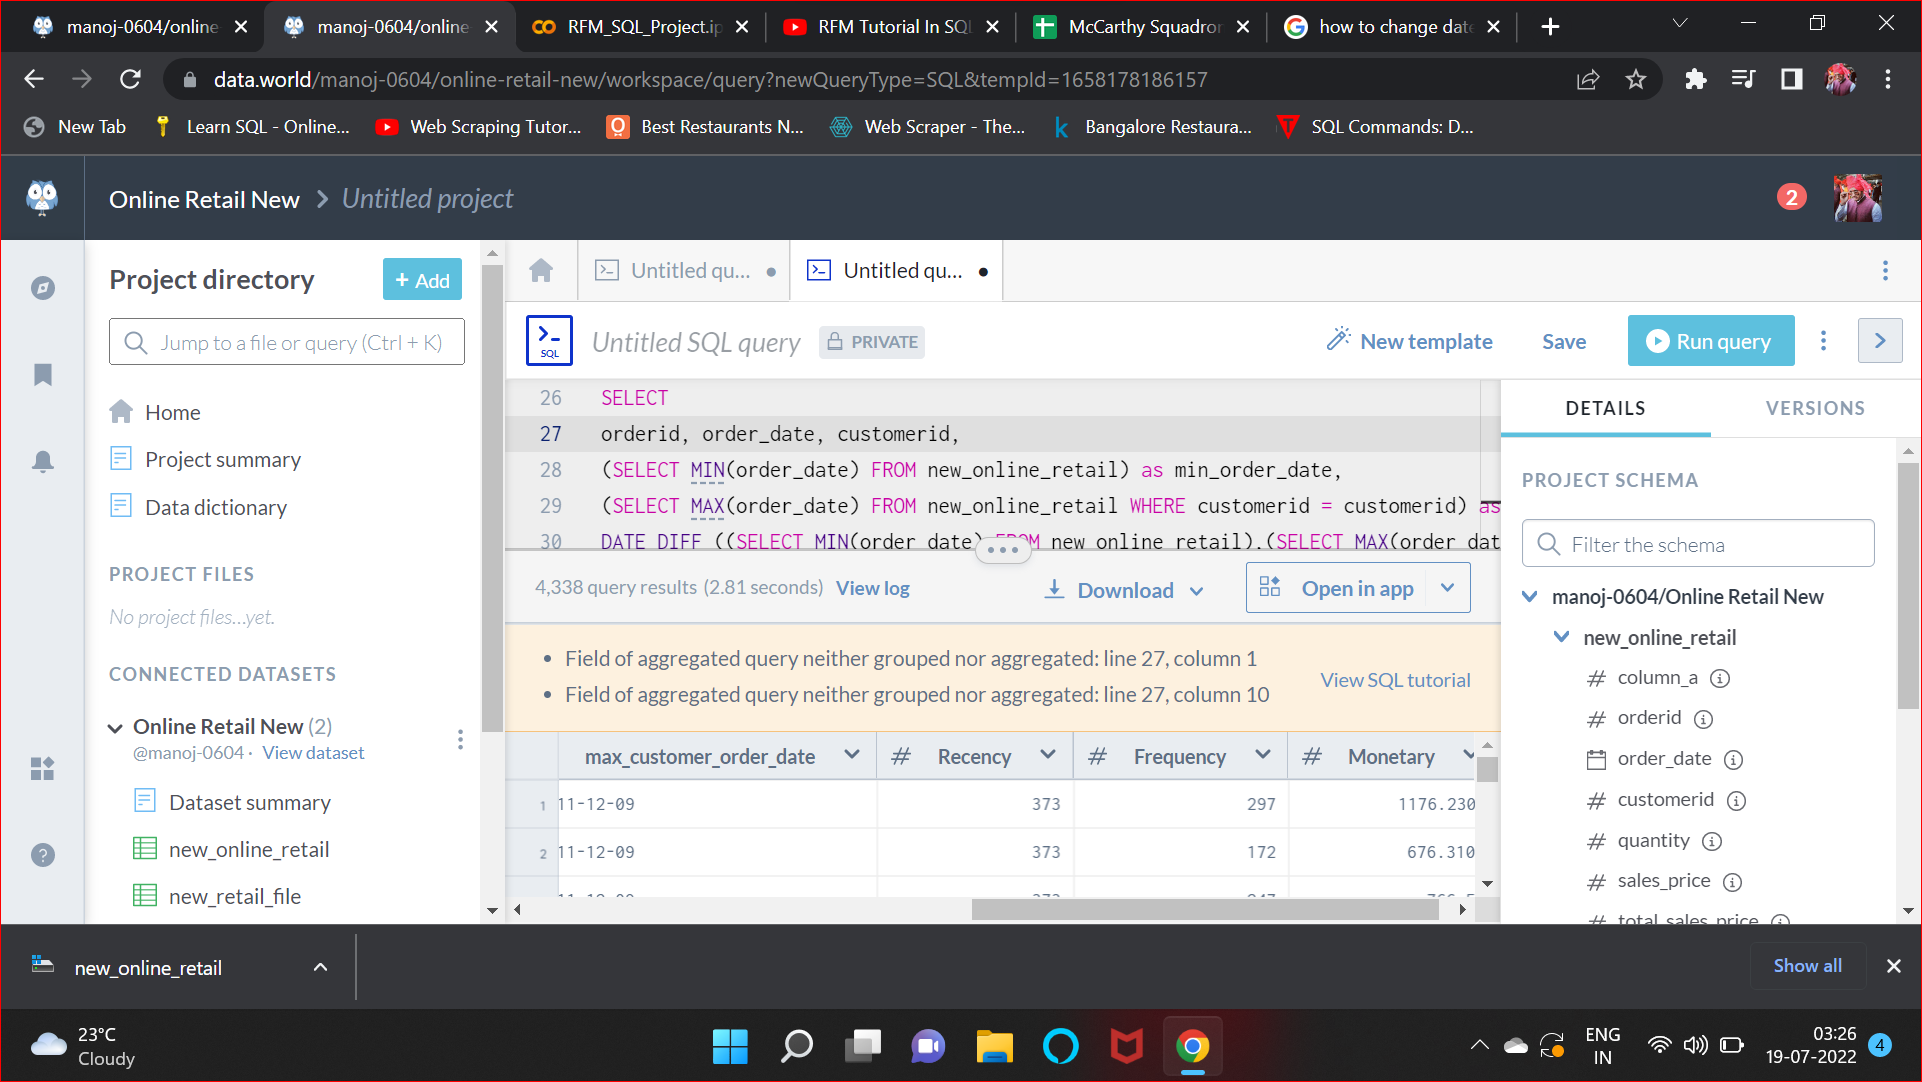